### **LeNet-Handwritten character recognition**

LeNet-5, from the paper Gradient-Based Learning Applied to Document Recognition, is a very efficient convolutional neural network for handwritten character recognition.
Paper: http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf

In [1]:
from google.colab import files
uploaded = files.upload()

Saving lent.png to lent.png


### **Introduction**
**LeNet5** is a small network, it contains the basic modules of deep learning: convolutional layer, pooling layer, and full link layer. It is the basis of other deep learning models. 

**LeNet-5** Total seven layer , does not comprise an input, each containing a trainable parameters; each layer has a plurality of the Map the Feature , a characteristic of each of the input FeatureMap extracted by means of a convolution filter, and then each FeatureMap There are multiple neurons.

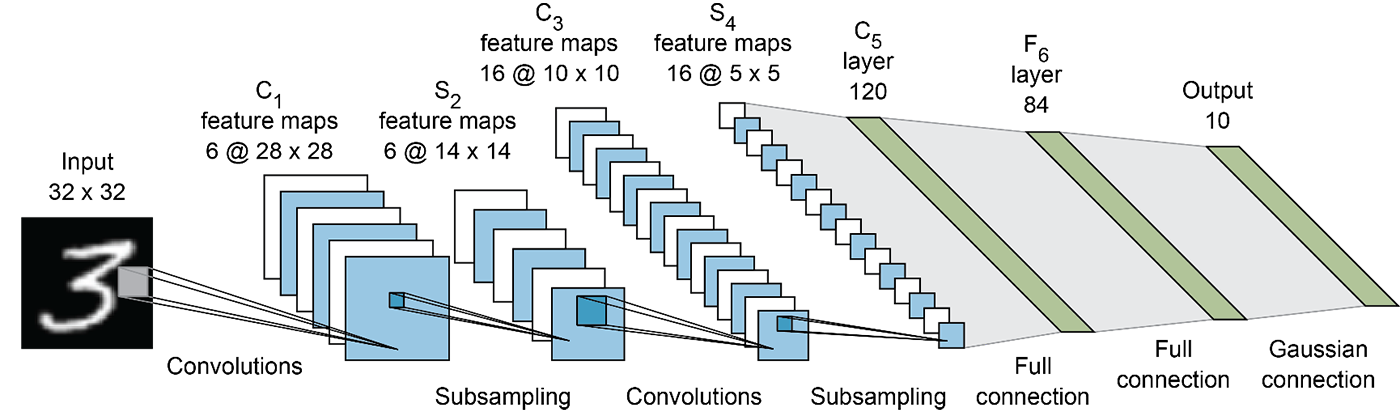

In [5]:
from IPython.display import Image
Image('lent.png',width=800)

We are going to develop CNN model  based on this concet which has develop by Yann LeCun on 1998. This is called as LeNet.

In [29]:
#import Libraries
import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential

In [30]:
# Loading the dataset and perform splitting
(train_X, train_y), (test_X, test_y) = mnist.load_data()


In [53]:
print('X_train dataset shape is ' + str(train_X.shape))
print('Y_train dataset shape is ' + str(train_y.shape))
print('X_test dataset shape  is ' + str(test_X.shape))
print('Y_test dataset shape  is ' + str(test_y.shape))

X_train dataset shape is (60000, 28, 28)
Y_train dataset shape is (60000,)
X_test dataset shape  is (10000, 28, 28)
Y_test dataset shape  is (10000,)


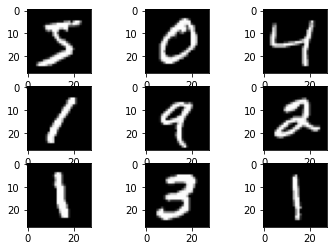

In [32]:
#Ploting the Fiorst 9 images which has presented in the train_x
from matplotlib import pyplot
for i in range(9):  
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

Train and test images (28px x 28px) has been stock into pandas.Dataframe as 1D vectors of 784 values. We reshape all data to 28x28x1 3D matrices.

Keras requires an extra dimension in the end which correspond to channels. MNIST images are gray scaled so it use only one channel. For RGB images, there is 3 channels, we would have reshaped 784px vectors to 28x28x3 3D matrices.

In [33]:
# Peforming reshaping operation
x_train = train_X.reshape(train_X.shape[0], 28, 28, 1)
x_test = test_X.reshape(test_X.shape[0], 28, 28, 1)

In [42]:
y_train = train_y.reshape(train_X.shape[0], 1)
y_test = test_y.reshape(test_X.shape[0], 1)

In [44]:
#After reshape 
print('x_train: ' + str(x_train.shape))
print('x_test: ' + str(x_test.shape))
print('y_train: ' + str(y_train.shape))
print('y_test: ' + str(y_test.shape))

x_train: (60000, 28, 28, 1)
x_test: (10000, 28, 28, 1)
y_train: (60000, 1)
y_test: (10000, 1)


In [35]:
# Normalization
x_train = x_train / 255
x_test = x_test / 255

In [46]:
# One Hot Encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

### Developing the Model

In [38]:
model = Sequential()
# Select 6 feature convolution kernels with a size of 5 * 5 (without offset), and get 66 feature maps. The size of each feature map is 32−5 + 1 = 2832−5 + 1 = 28.
# That is, the number of neurons has been reduced from 10241024 to 28 ∗ 28 = 784 28 ∗ 28 = 784.
# Parameters between input layer and C1 layer: 6 ∗ (5 ∗ 5 + 1)
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
# The input of this layer is the output of the first layer, which is a 28 * 28 * 6 node matrix.
# The size of the filter used in this layer is 2 * 2, and the step length and width are both 2, so the output matrix size of this layer is 14 * 14 * 6.
model.add(MaxPooling2D(pool_size=(2, 2)))
# The input matrix size of this layer is 14 * 14 * 6, the filter size used is 5 * 5, and the depth is 16. This layer does not use all 0 padding, and the step size is 1.
# The output matrix size of this layer is 10 * 10 * 16. This layer has 5 * 5 * 6 * 16 + 16 = 2416 parameters
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
# The input matrix size of this layer is 10 * 10 * 16. The size of the filter used in this layer is 2 * 2, and the length and width steps are both 2, so the output matrix size of this layer is 5 * 5 * 16.
model.add(MaxPooling2D(pool_size=(2, 2)))
# The input matrix size of this layer is 5 * 5 * 16. This layer is called a convolution layer in the LeNet-5 paper, but because the size of the filter is 5 * 5, #
# So it is not different from the fully connected layer. If the nodes in the 5 * 5 * 16 matrix are pulled into a vector, then this layer is the same as the fully connected layer.
# The number of output nodes in this layer is 120, with a total of 5 * 5 * 16 * 120 + 120 = 48120 parameters.
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

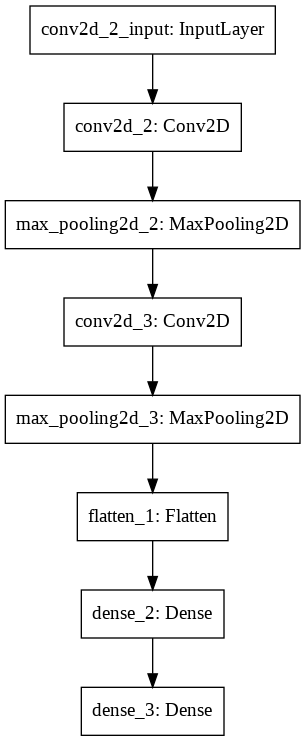

In [40]:
from keras.utils.vis_utils import plot_model
plot_model(model)

In [54]:
model.compile(loss=keras.metrics.categorical_crossentropy,optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
history=model.fit(x_train,y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 22s 47ms/step - loss: 0.0075 - accuracy: 0.9975 - val_loss: 0.0389 - val_accuracy: 0.9896
Epoch 2/10
469/469 [==============================] - 22s 47ms/step - loss: 0.0064 - accuracy: 0.9979 - val_loss: 0.0346 - val_accuracy: 0.9895
Epoch 3/10
469/469 [==============================] - 22s 47ms/step - loss: 0.0079 - accuracy: 0.9974 - val_loss: 0.0395 - val_accuracy: 0.9902
Epoch 4/10
469/469 [==============================] - 22s 46ms/step - loss: 0.0049 - accuracy: 0.9982 - val_loss: 0.0441 - val_accuracy: 0.9885
Epoch 5/10
469/469 [==============================] - 22s 47ms/step - loss: 0.0051 - accuracy: 0.9983 - val_loss: 0.0417 - val_accuracy: 0.9897
Epoch 6/10
469/469 [==============================] - 22s 47ms/step - loss: 0.0068 - accuracy: 0.9979 - val_loss: 0.0436 - val_accuracy: 0.9905
Epoch 7/10
469/469 [==============================] - 22s 46ms/step - loss: 0.0047 - accuracy: 0.9983 - val_loss: 0.0477 - val_accuracy:

In [59]:
history.history

{'accuracy': [0.9971833229064941,
  0.9972333312034607,
  0.9981333613395691,
  0.9975166916847229,
  0.998283326625824,
  0.9981333613395691,
  0.9980499744415283,
  0.9978333115577698,
  0.9990333318710327,
  0.9983333349227905],
 'loss': [0.008580171503126621,
  0.007941963151097298,
  0.005876176059246063,
  0.006789441220462322,
  0.004883155692368746,
  0.005566795822232962,
  0.005215700715780258,
  0.0061356499791145325,
  0.003076759399846196,
  0.0047309244982898235],
 'val_accuracy': [0.9896000027656555,
  0.9894999861717224,
  0.9901999831199646,
  0.9884999990463257,
  0.9897000193595886,
  0.9904999732971191,
  0.9882000088691711,
  0.9904000163078308,
  0.9883000254631042,
  0.9909999966621399],
 'val_loss': [0.038869135081768036,
  0.03458874672651291,
  0.03953832760453224,
  0.04409610852599144,
  0.04168150573968887,
  0.04356849566102028,
  0.047729719430208206,
  0.03862937539815903,
  0.053335029631853104,
  0.043829504400491714]}

### Model Evaluation


In [56]:
score = model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 7ms/step - loss: 0.0438 - accuracy: 0.9910
Test Loss: 0.043829478323459625
Test accuracy: 0.9909999966621399


### **Evaluation of Accuracy and Losses**

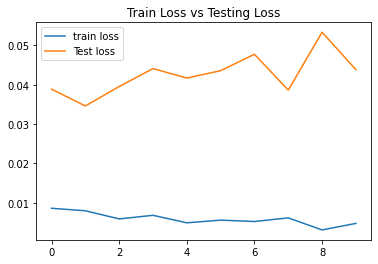

<Figure size 432x288 with 0 Axes>

In [57]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title("Train Loss vs Testing Loss")
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

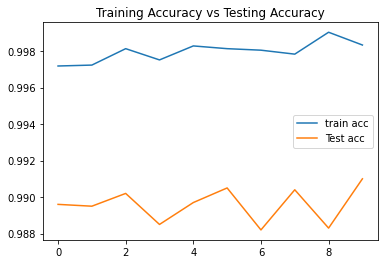

<Figure size 432x288 with 0 Axes>

In [58]:
# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='Test acc')
plt.title("Training Accuracy vs Testing Accuracy")
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

### Conclusion
We can see Le-Net It's working good with the cray color dataset but It was taking much computation time.